In [1]:
import numpy as np
import pandas as pd

In [2]:
# path
inputFolder = r"/Volumes/Mingyue_Plu/deltaN1E4/Mingyue_analysis_2/smapling/undersampling"
folderseparator = "/"
X = []
y = []
for i in range(121,131):#131
    myFFN = "sim%d_undersamp_x.csv" % (i)
    filenamex = inputFolder + folderseparator + myFFN
    df = pd.read_csv(filenamex)
    XX = df.iloc[:,0:60]
    X.append(XX)

    myTFN = "sim%d_undersamp_y.csv" % (i)
    filenamey = inputFolder + folderseparator + myTFN
    dt = pd.read_csv(filenamey)
    yy = dt.iloc[:,0]
    y.append(yy)

X = np.concatenate(X)
y = np.concatenate(y)
print('feature shape',X.shape)
print('target shape', y.shape)

feature shape (23160, 60)
target shape (23160,)


In [3]:
features_select = [9, 0, 2, 22, 50, 48, 11, 3, 52, 38] #[50,49,17,31,35,43,22,0,1,16]

X2 = X[:,features_select]
X2.shape

from sklearn.model_selection import train_test_split
rseed = 0
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3,stratify = y,random_state = rseed)
print(X_train.shape)

(16212, 10)


In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
scaling = StandardScaler()
model =  SVC(random_state=rseed, probability=True)
pipeline = make_pipeline(scaling,model)

In [5]:
cv = StratifiedKFold(n_splits=5)

param_range_C = [1.0, 10.0, 100.0, 1000.0]
param_range_gamma = [0.0001, 0.001, 0.01, 0.1]

param_grid = [{'svc__C': param_range_C, 
               'svc__gamma': param_range_gamma, 
               'svc__kernel': ['rbf']}]

gs = RandomizedSearchCV(estimator=pipeline, 
                  param_distributions=param_grid, 
                  scoring='balanced_accuracy',#'balanced_accuracy', 
                
                  cv=cv)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=rseed)

cv_results = cross_validate(gs.best_estimator_, X_train, y_train, scoring=('recall', 'balanced_accuracy'), cv=cv, n_jobs=-1)
    
acc_class1 = cv_results['test_recall'].mean()
acc_avg = cv_results['test_balanced_accuracy'].mean()
acc_class0 = (2*acc_avg - acc_class1).mean()

print('Mean Test Accuracy Class 1: = %.4f' % (acc_class1))
print('Mean Test Accuracy Class 0: = %.4f' % (acc_class0))

0.7101635505174051
{'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 10.0}
Mean Test Accuracy Class 1: = 0.6852
Mean Test Accuracy Class 0: = 0.7323


In [6]:
print('Training set score-balanced accuracy: ' + str(gs.score(X_train, y_train)))
print('Test set score-balanced accuracy: ' + str(gs.score(X_test, y_test)))

Training set score-balanced accuracy: 0.7122611639938503
Test set score-balanced accuracy: 0.7169006125361732


In [ ]:
import csv
i=1
new = "features_sim121_%dL.csv" % (i)
path = r"/Volumes/Mingyue_Plu/deltaN1E4/Mingyue_analysis/feature/sim121_run1_L_all_features_csv"
file_csv = path + folderseparator + new
new_feature= pd.read_csv(file_csv, sep=',',header = None)
tt = new_feature.to_numpy()
new_feature2 = tt[:,features_select]
syn_pred = gs.best_estimator_.predict(new_feature2)
syn_pred_prob = gs.best_estimator_.predict_proba(new_feature2)
round_off_predictions = np.around(syn_pred_prob, decimals = 4)
file = open(r'sim121_%dL_pre_prob.csv'% (i), 'w+', newline ='') 
with file:     
    write = csv.writer(file) 
    write.writerows(syn_pred_prob)

In [ ]:
import csv
for i in range(1,1001):
    new = "features_sim121_%dL.csv" % (i)
    path = r"/Volumes/Mingyue_Plu/deltaN1E4/Mingyue_analysis/feature/sim121_run1_L_all_features_csv"
    file_csv = path + folderseparator + new
    new_feature= pd.read_csv(file_csv, sep=',',header = None)
    tt = new_feature.to_numpy()
    new_feature2 = tt[:,features_select]
    syn_pred = gs.best_estimator_.predict(new_feature2)
    syn_pred_prob = gs.best_estimator_.predict_proba(new_feature2)
    round_off_predictions = np.around(syn_pred_prob, decimals = 4)
    file = open(r'sim121_%dL_pre_prob.csv'% (i), 'w+', newline ='') 
    with file:
        write = csv.writer(file) 
        write.writerows(syn_pred_prob)

In [7]:
from sklearn.metrics import confusion_matrix
inputFolder = r"/Volumes/Mingyue_Plu/deltaN1E4/Mingyue_analysis_2"
folderseparator = "/"
for i in range(121,122):#131
    myFN = 'sim%d_d2min_tho015_int1.csv' % (i)
    filename = inputFolder + folderseparator + myFN
    df = pd.read_csv(filename,header = None)
    Xnew = df.iloc[:,features_select]
    Xnew = Xnew.values
    ynew = df.iloc[:,60]
    ynew = ynew.values
    syn_pred = gs.best_estimator_.predict(Xnew)

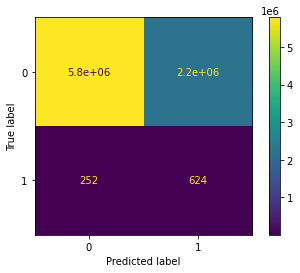

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(ynew, syn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [9]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ynew, syn_pred, average=None)

0.7184933250221943